<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

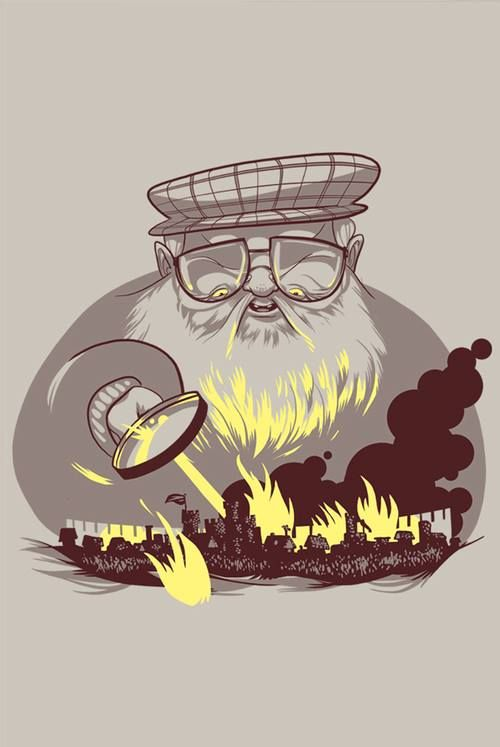

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [554]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 37.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 75.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [555]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [556]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [504]:
data_nan = data.isna().sum(axis=0).to_frame(name='Количество NaN')
data_nan

,Количество NaN
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [558]:
percentage_nan = []
for ind, _ in enumerate(list(data.columns)):
  percentage_nan.append(round(data[data.columns[ind]].isna().sum(axis=0)/len(data[data.columns[ind]]) * 100, 3))

data_nan['Процент NaN'] = percentage_nan
data_nan

,Количество NaN,Процент NaN
name,0,0.000
title,840,53.950
male,0,0.000
culture,1069,68.658
dateOfBirth,1278,82.081
mother,1539,98.844
father,1535,98.587
heir,1536,98.651
house,381,24.470
spouse,1357,87.155


Text(0.5, 1.0, 'Процент пропущенных значений в каждом столбце')

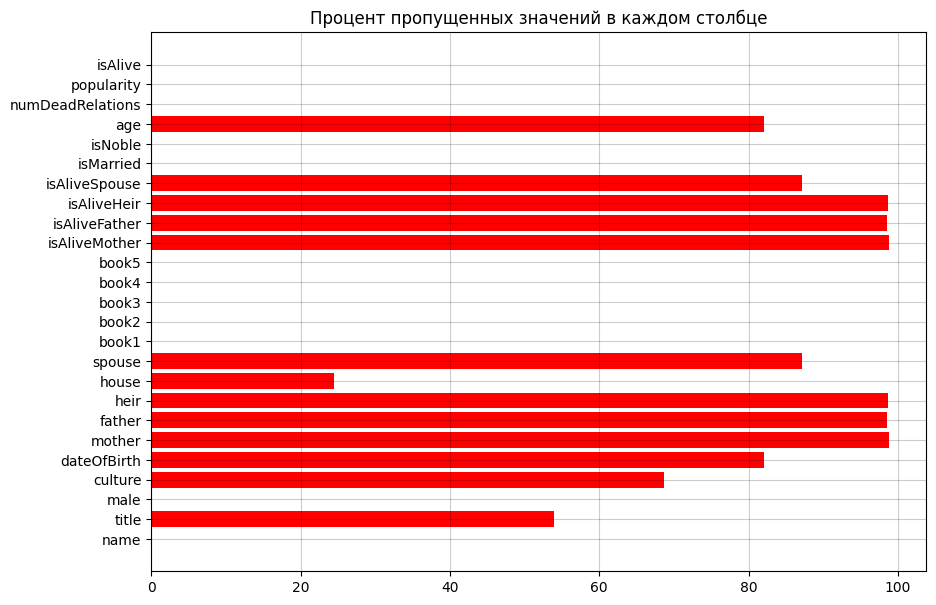

In [559]:
plt.figure(figsize=(10, 7))
plt.grid(color='black', alpha=0.2)
plt.barh(data_nan.index, data_nan['Процент NaN'], color='red')
plt.title('Процент пропущенных значений в каждом столбце')

In [560]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [561]:
#для того, чтобы принимать решение по поводу значений NaN, посмотрим корреляцию количественных признаков по отношению к целевой переменной
#для этого нужно удалить качественные признаки. очевидно, что имя персонажа, его родителей, наследника и супруги(а) не влияют на целевую переменную.
#поэтому их можно удалить. остальные целевые признаки пока поместим в отдельный датасет

data.drop(['name', 'spouse', 'heir', 'father', 'mother'], axis=1, inplace=True)

qual_features = pd.DataFrame()
for col in list(data.columns):
  if col in ['title', 'house', 'culture']:
    qual_features[col] = data[col]
    data.drop(col, axis=1, inplace=True)

qual_features

,title,culture,house
S.No,,,
1,NaN,NaN,NaN
2,Lord of the Crossing,Rivermen,House Frey
3,Ser,NaN,House Swyft
4,Queen,NaN,House Arryn
5,Greenstone,Dornish,House Santagar
...,...,...,...
1553,Archmaester,NaN,NaN
1554,NaN,NaN,NaN
1555,NaN,NaN,House Seaworth


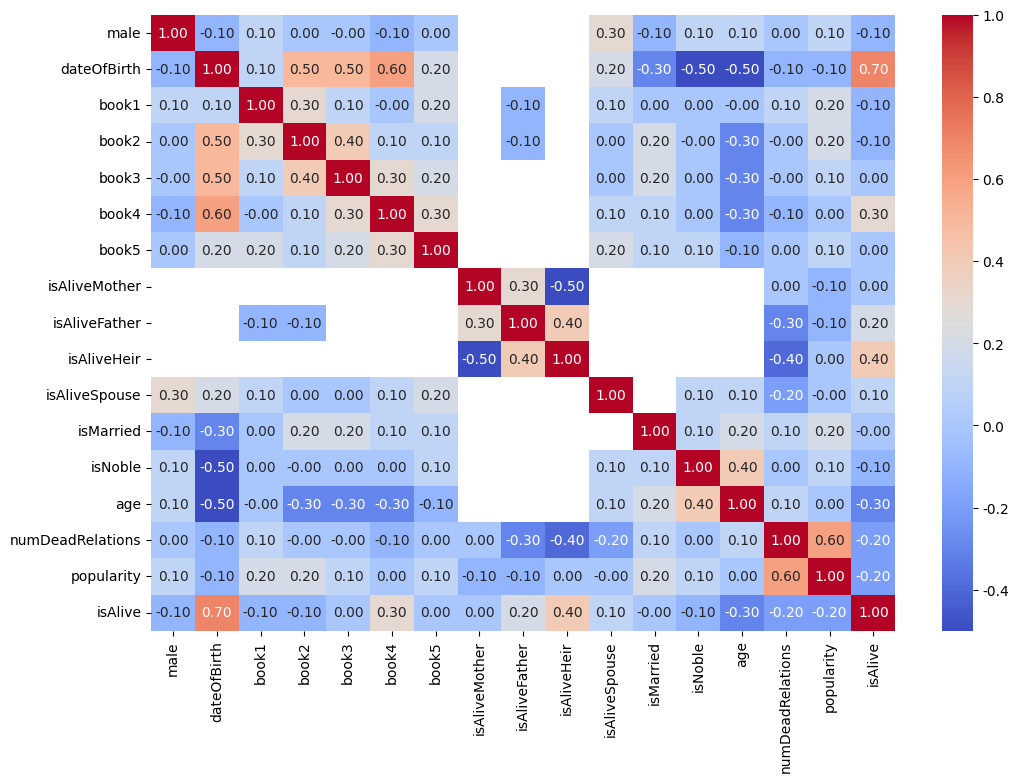

In [562]:
#посмотрим корреляцию количественных признаков
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

In [563]:
#объединим обратно датасет с качественными признаками
data = pd.concat([data, qual_features], axis = 1)

In [511]:
n_to_remove = 800

# Находим индексы строк с NaN в столбце DateofBirth
nan_indices = data[data['dateOfBirth'].isna()].index

# Выбираем первые n_to_remove индексов
indices_to_remove = nan_indices[:n_to_remove]

# Удаляем строки по выбранным индексам
data.drop(indices_to_remove, inplace=True)

In [564]:
data['dateOfBirth'].fillna(-1, inplace=True)

<ipython-input-564-6a9d85ab1dd5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dateOfBirth'].fillna(-1, inplace=True)


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [565]:
isPopular = isPopular = list(map(lambda x: 0.5 if x == 0.5 else (0 if x < 0.5 else 1), data['popularity']))
data['isPopular'] = isPopular

boolDeadRelations = [1 if x > 0 else 0 for x in data['numDeadRelations']]
data['boolDeadRelations'] = boolDeadRelations

data.drop(['numDeadRelations', 'popularity'], axis=1, inplace=True)
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,title,culture,house,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1,1,-1.0,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,0,NaN,NaN,NaN,1,1
2,1,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,Lord of the Crossing,Rivermen,House Frey,1,1
3,1,-1.0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,1,Ser,NaN,House Swyft,0,0
4,0,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,Queen,NaN,House Arryn,0,0
5,0,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,1,Greenstone,Dornish,House Santagar,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,-1.0,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,NaN,1,Archmaester,NaN,NaN,0,0
1554,0,-1.0,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0
1555,1,-1.0,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,House Seaworth,0,0


In [566]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

reverse_cult = {value: key for key, values in cult.items() for value in values}

def simplify_culture(culture):

  if pd.isna(culture):
        return culture

  culture_lower = culture.lower()
  return reverse_cult.get(culture_lower, culture)

data['culture'] = data['culture'].apply(simplify_culture)
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,title,culture,house,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1,1,-1.0,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,0,NaN,NaN,NaN,1,1
2,1,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,Lord of the Crossing,Rivermen,House Frey,1,1
3,1,-1.0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,1,Ser,NaN,House Swyft,0,0
4,0,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,Queen,NaN,House Arryn,0,0
5,0,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,1,Greenstone,Dornish,House Santagar,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,-1.0,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,NaN,1,Archmaester,NaN,NaN,0,0
1554,0,-1.0,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0
1555,1,-1.0,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,House Seaworth,0,0


In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   dateOfBirth        1557 non-null   float64
 2   book1              1557 non-null   int64  
 3   book2              1557 non-null   int64  
 4   book3              1557 non-null   int64  
 5   book4              1557 non-null   int64  
 6   book5              1557 non-null   int64  
 7   isAliveMother      18 non-null     float64
 8   isAliveFather      22 non-null     float64
 9   isAliveHeir        21 non-null     float64
 10  isAliveSpouse      200 non-null    float64
 11  isMarried          1557 non-null   int64  
 12  isNoble            1557 non-null   int64  
 13  age                279 non-null    float64
 14  isAlive            1557 non-null   int64  
 15  title              717 non-null    object 
 16  culture            488 non-nu

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [568]:
#удалим колонки с количественными признаками, которые имеют корреляцию с целевой переменной 0
data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1, inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [569]:
#целевая переменная количественная
balance_data = data['isAlive'].value_counts(normalize=True) * 100
balance_data

,proportion
isAlive,
1,77.842004
0,22.157996


In [ ]:
#виден очевидный дисбаланс

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [570]:
#переводим качественные признаки title, house, culture в количественные
culture = len(data['culture'].unique())
title = len(data['title'].unique())
house = len(data['house'].unique())
print(culture)
print(title)
print(house)

for col in ['culture', 'title', 'house']:
  freq = data[col].value_counts(normalize=True)
  data[f'{col}_encoded'] = data[col].map(freq)

data.drop(['culture', 'title', 'house'], axis=1, inplace=True)
data.head(10)

35
196
316


,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,culture_encoded,title_encoded,house_encoded
S.No,,,,,,,,,,,,,,,,
1,1,-1.0,0,0,0,0,0,0,0,NaN,0,1,1,NaN,NaN,NaN
2,1,208.0,1,1,1,1,1,1,1,97.0,1,1,1,0.020492,0.001395,0.075680
3,1,-1.0,0,0,0,1,0,0,1,NaN,1,0,0,NaN,0.426778,0.005952
4,0,82.0,0,0,0,0,0,1,1,23.0,0,0,0,NaN,0.004184,0.009354
5,0,276.0,0,0,0,1,0,1,1,29.0,1,0,0,0.043033,0.001395,0.001701
6,1,-1.0,0,0,0,0,0,0,0,NaN,1,1,1,NaN,NaN,NaN
7,1,183.0,0,0,0,0,0,1,1,26.0,0,0,0,0.057377,0.002789,0.034014
8,1,-1.0,0,0,0,0,0,0,0,NaN,0,1,1,NaN,NaN,NaN
9,1,-1.0,0,0,1,0,0,0,1,NaN,0,0,0,NaN,0.426778,NaN


In [571]:
data['culture_encoded'] = data['culture_encoded'].fillna(data['culture_encoded'].mean())
data['title_encoded'] = data['title_encoded'].fillna(data['title_encoded'].mean())
data['house_encoded'] = data['house_encoded'].fillna(data['house_encoded'].mean())

In [572]:
data.fillna(data.mean(), inplace=True)

In [573]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   dateOfBirth        1557 non-null   float64
 2   book1              1557 non-null   int64  
 3   book2              1557 non-null   int64  
 4   book3              1557 non-null   int64  
 5   book4              1557 non-null   int64  
 6   book5              1557 non-null   int64  
 7   isMarried          1557 non-null   int64  
 8   isNoble            1557 non-null   int64  
 9   age                1557 non-null   float64
 10  isAlive            1557 non-null   int64  
 11  isPopular          1557 non-null   int64  
 12  boolDeadRelations  1557 non-null   int64  
 13  culture_encoded    1557 non-null   float64
 14  title_encoded      1557 non-null   float64
 15  house_encoded      1557 non-null   float64
dtypes: float64(5), int64(11)
memo

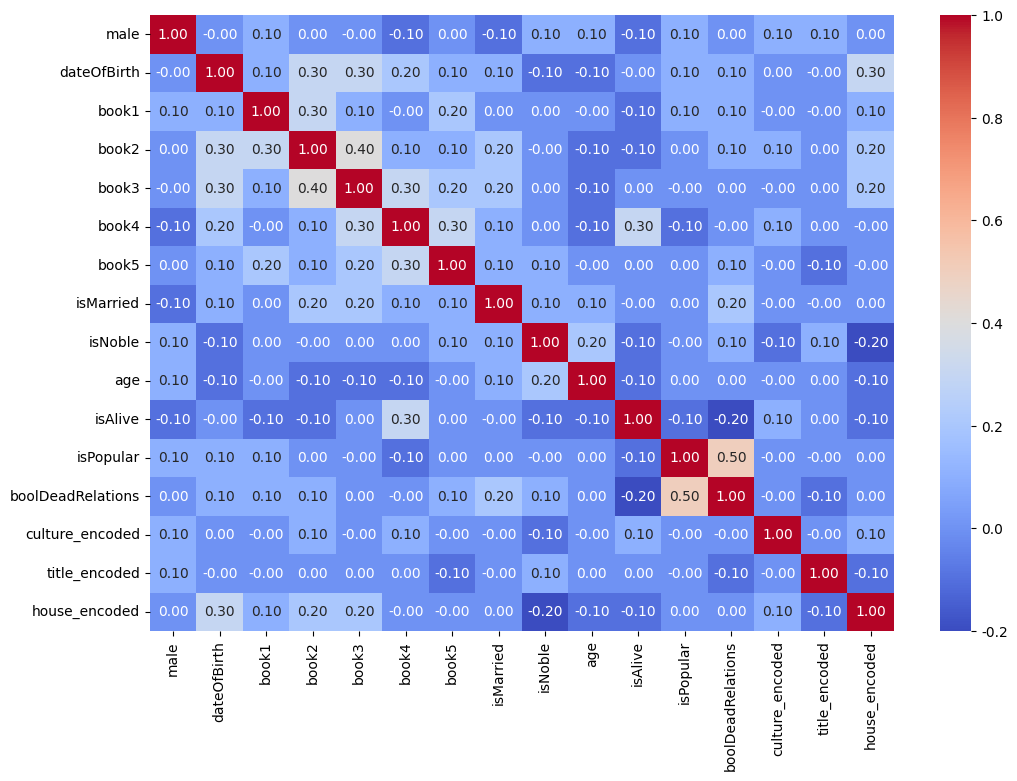

In [574]:
#посмотрим еще раз на корреляцию
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [637]:
X = data.drop('isAlive', axis=1).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [622]:
from sklearn.model_selection import train_test_split

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2498, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [611]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [638]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [639]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

In [640]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [641]:
models = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42),
          DecisionTreeClassifier(random_state=42)]

In [642]:
mean=[]
std=[]
for model in models:
    result = cross_val_score(model, X, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)
    std.append(result)

In [643]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2498, shuffle=True)

In [646]:
rf_clf = LogisticRegression(max_iter=5000)

In [647]:
rf_clf.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [613]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(max_iter=5000, solver='liblinear')

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [648]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [650]:
# Шаг 3. Предсказание на тестовых данных
y_pred = rf_clf.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7866


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [652]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.8MB/s]


In [653]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [654]:
submission['isAlive'] = y_pred

In [655]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [657]:
submission.to_csv("/content/new_submission.csv", index=False)